In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\janli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from multiprocessing import Pool

import importlib

import utils

importlib.reload(utils)

from utils import null_summary, load_data

In [15]:
data_path = 'm5-forecasting-accuracy'

data = load_data()

calendar = pd.read_csv(f"{data_path}/calendar.csv")
sell_prices = pd.read_csv(f"{data_path}/sell_prices.csv")

## EDA

In [16]:
null_summary(data)

,zero_share_id,zero_share_item_id,zero_share_dept_id,zero_share_cat_id,zero_share_store_id,zero_share_state_id,zero_share_d,zero_share_value,zero_share_day_num,zero_share_date,...,zero_share_wday,zero_share_month,zero_share_year,zero_share_event_name_1,zero_share_event_type_1,zero_share_event_name_2,zero_share_event_type_2,zero_share_snap,zero_share_sell_price,zero_share_total_volume
count,30490.000000,3049.000000,7.000000,3.000000,10.000000,3.000000,1941.000000,419.000000,1941.000000,1941.000000,...,7.000000,12.000000,6.000000,30.000000,4.000000,4.000000,2.000000,2.000000,1036.000000,10393.000000
mean,0.600841,0.600914,0.629021,0.623898,0.596028,0.599107,0.591098,0.002387,0.591098,0.591098,...,0.596070,0.596302,0.589340,0.614668,0.608336,0.589378,0.604387,0.593034,0.701309,0.000096
std,0.233535,0.207892,0.138010,0.103903,0.046231,0.028475,0.046627,0.048853,0.046627,0.046627,...,0.028153,0.010634,0.025262,0.080608,0.033284,0.034772,0.035795,0.012358,0.183390,0.009809
min,0.001546,0.004534,0.473475,0.510869,0.494932,0.566229,0.361599,0.000000,0.361599,0.361599,...,0.555089,0.581375,0.553707,0.537738,0.587736,0.554007,0.579076,0.584296,0.128348,0.000000
25%,0.432251,0.454615,0.537809,0.578217,0.578904,0.590720,0.563494,0.000000,0.563494,0.563494,...,0.577220,0.589015,0.574078,0.586009,0.592216,0.564270,0.591731,0.588665,0.583966,0.000000
50%,0.633694,0.627881,0.567879,0.645565,0.608101,0.615211,0.594468,0.000000,0.594468,0.594468,...,0.603660,0.595072,0.590207,0.598842,0.593765,0.586903,0.604387,0.593034,0.730724,0.000000
75%,0.795981,0.767919,0.719062,0.680412,0.627262,0.615546,0.620695,0.000000,0.620695,0.620695,...,0.619566,0.599618,0.606158,0.610587,0.609886,0.612010,0.617042,0.597403,0.857143,0.000000
max,0.990579,0.964216,0.848051,0.715259,0.643831,0.615881,0.999606,1.000000,0.999606,0.999606,...,0.620170,0.620649,0.621742,0.999518,0.658079,0.629698,0.629698,0.601772,1.000000,1.000000


<Axes: >

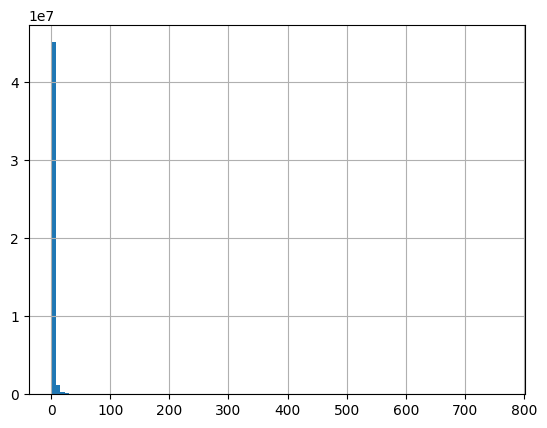

In [30]:
data["value"].hist(bins=100)

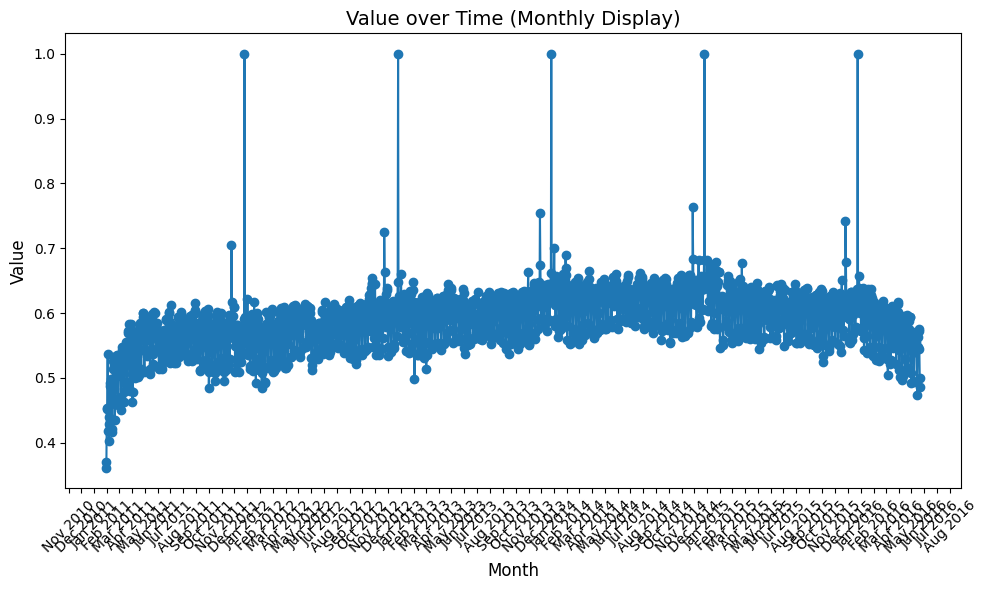

In [17]:
result = (
    data
    .groupby("date",as_index=False)
    .agg({
        'value': lambda x: (x == 0).sum() / len(x),
        # Add other columns here if needed
    })
    .rename(columns={'value': 'zero_share_value'})
)

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot the line chart (can be a bar plot or any other plot)
plt.plot(result['date'], result['zero_share_value'], marker='o')

# Set title and labels
plt.title('Value over Time (Monthly Display)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Format the x-axis to display only the month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Month abbreviation and year (e.g., Jan 2024)

# Set x-axis major locator to show monthly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

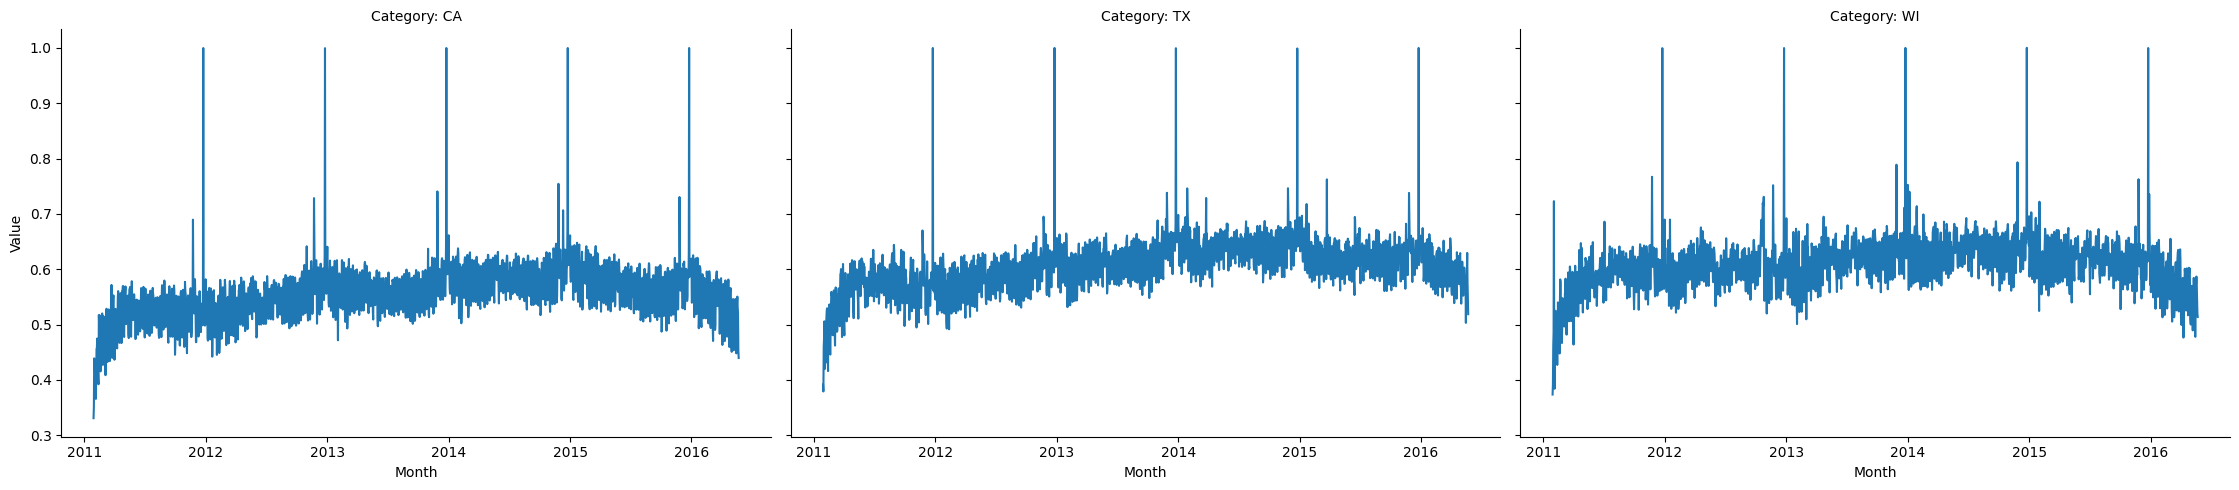

In [18]:
result = (
    data
    .groupby(["date","state_id"],as_index=False)
    .agg({
        'value': lambda x: (x == 0).sum() / len(x),
        # Add other columns here if needed
    })
    .rename(columns={'value': 'zero_share_value'})
)

# Convert 'date' column to datetime
df = pd.DataFrame(result)
df['date'] = pd.to_datetime(df['date'])

# Create the FacetGrid for faceting by 'category'
g = sns.FacetGrid(df, col="state_id", height=5, aspect=1.5)  # Facet by category

# Map the line plot to each facet
g.map(sns.lineplot, 'date', 'zero_share_value')

# Set title and labels
g.set_axis_labels('Month', 'Value')
g.set_titles('Category: {col_name}')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

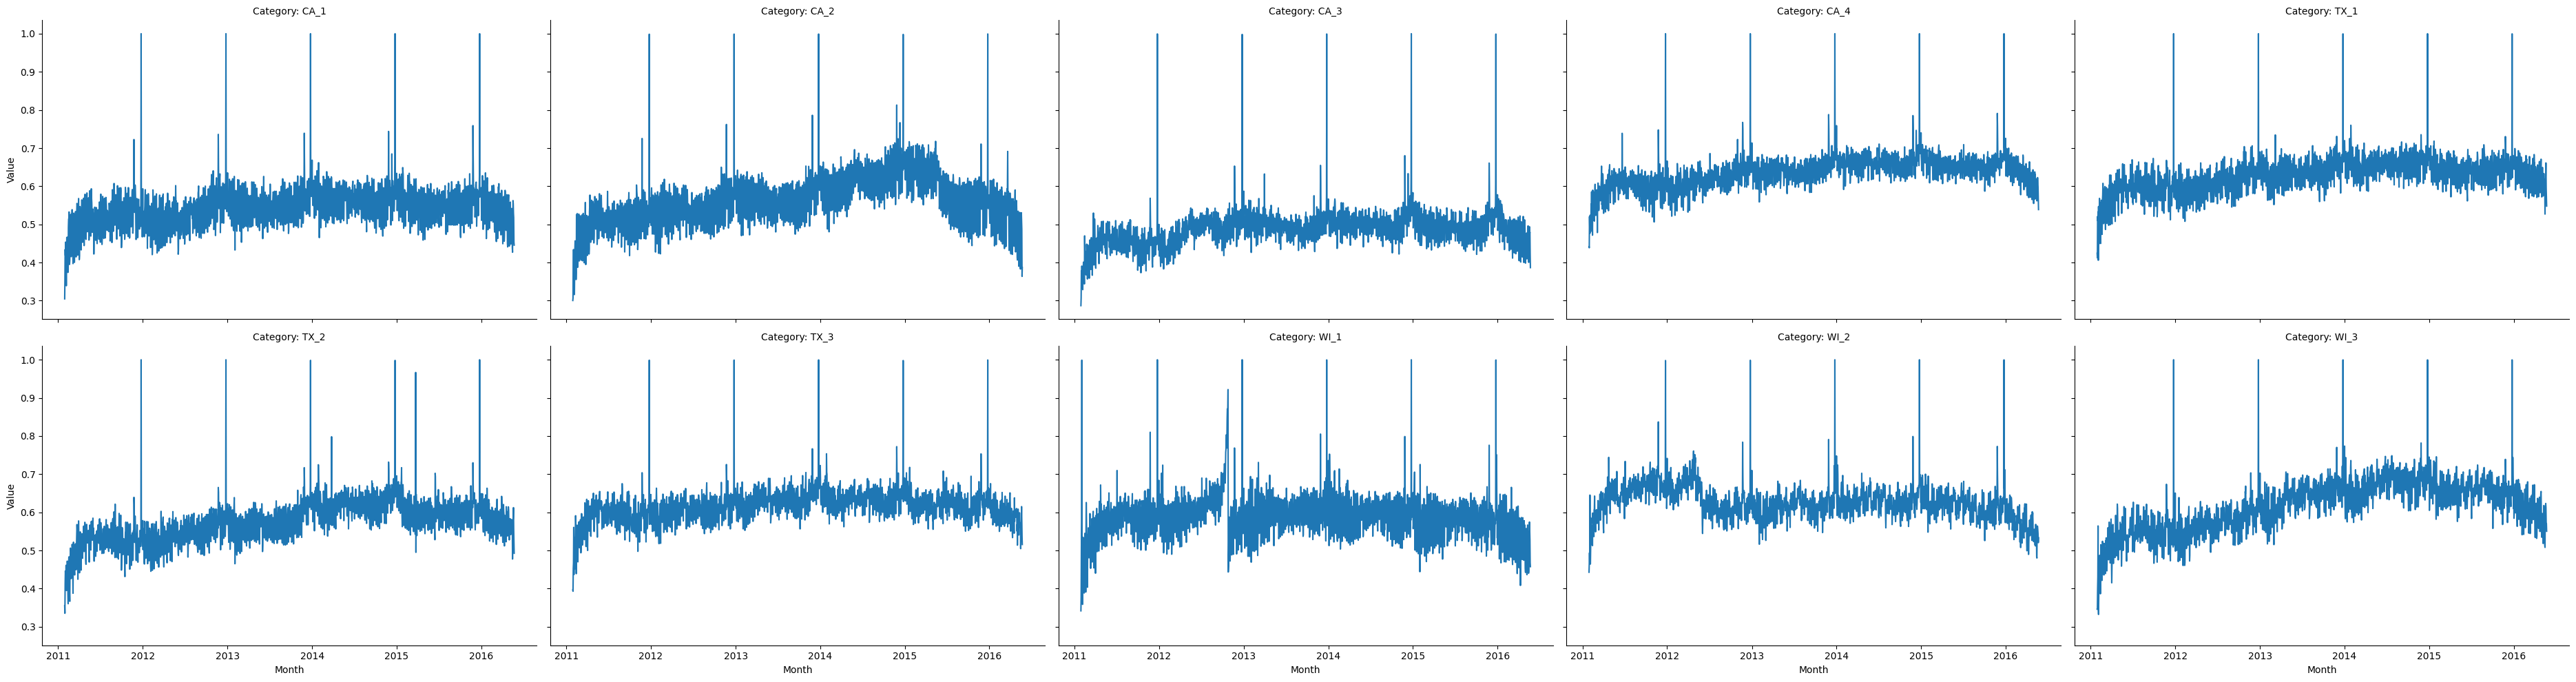

In [19]:
result = (
    data
    .groupby(["date","store_id"],as_index=False)
    .agg({
        'value': lambda x: (x == 0).sum() / len(x),
        # Add other columns here if needed
    })
    .rename(columns={'value': 'zero_share_value'})
)

# Convert 'date' column to datetime
df = pd.DataFrame(result)
df['date'] = pd.to_datetime(df['date'])

# Create the FacetGrid for faceting by 'category'
g = sns.FacetGrid(df, col="store_id", height=5, aspect=1.5, col_wrap=5)  # Facet by category

# Map the line plot to each facet
g.map(sns.lineplot, 'date', 'zero_share_value')

# Set title and labels
g.set_axis_labels('Month', 'Value')
g.set_titles('Category: {col_name}')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
data.groupby("store_id")["value"].sum().sort_values()

store_id
CA_4     4182534
WI_1     5261506
TX_1     5692823
CA_2     5818395
TX_3     6205940
WI_3     6542557
WI_2     6697988
TX_2     7329642
CA_1     7832248
CA_3    11363540
Name: value, dtype: int64

In [21]:
(
    sell_prices
        .merge(calendar[["wm_yr_wk","year"]]
        .drop_duplicates(), on = "wm_yr_wk")
        .groupby("year",as_index=False)["sell_price"]
        .mean()
        .assign(last_val = lambda x : x["sell_price"].shift(1))
        .assign(ratio = lambda x : (x.sell_price/ x.last_val).apply(lambda y: f"{y:.2f}%") )
)

,year,sell_price,last_val,ratio
0,2011,4.258325,NaN,nan%
1,2012,4.369304,4.258325,1.03%
2,2013,4.381071,4.369304,1.00%
3,2014,4.432266,4.381071,1.01%
4,2015,4.478093,4.432266,1.01%
5,2016,4.482674,4.478093,1.00%


<Axes: xlabel='wm_yr_wk'>

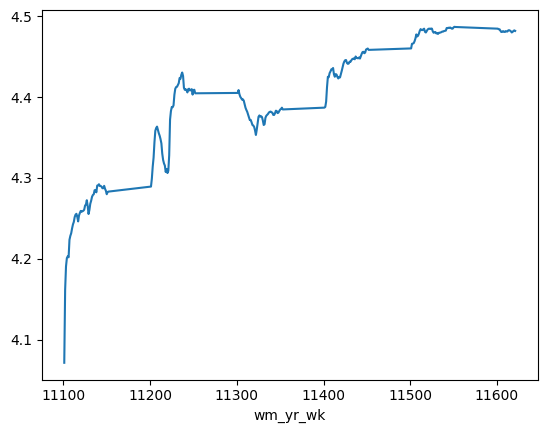

In [22]:
sell_prices.groupby("wm_yr_wk")["sell_price"].mean().plot()

In [23]:
data[["sell_price","value"]].corr()

,sell_price,value
sell_price,1.000000,-0.150812
value,-0.150812,1.000000


<Axes: xlabel='date'>

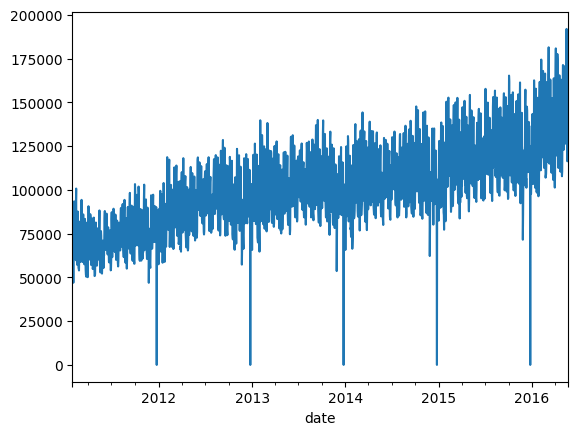

In [24]:
data.groupby("date")["total_volume"].sum().plot()

In [26]:
data.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d,value,day_num,date,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap,sell_price,total_volume,train
0,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,1,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,0.46,5.52,True
1,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,1,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,1.56,3.12,True
2,HOBBIES_1_010_CA_1_evaluation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,1,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,3.17,0.00,True
3,HOBBIES_1_012_CA_1_evaluation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,1,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,5.98,0.00,True
4,HOBBIES_1_015_CA_1_evaluation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,1,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,0.70,2.80,True
5,HOBBIES_1_016_CA_1_evaluation,HOBBIES_1_016,HOBBIES_1,HOBBIES,CA_1,CA,d_1,5,1,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,0.70,3.50,True
6,HOBBIES_1_022_CA_1_evaluation,HOBBIES_1_022,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,1,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,6.86,13.72,True
7,HOBBIES_1_023_CA_1_evaluation,HOBBIES_1_023,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,1,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,3.44,6.88,True
8,HOBBIES_1_028_CA_1_evaluation,HOBBIES_1_028,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,1,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,6.67,0.00,True
9,HOBBIES_1_029_CA_1_evaluation,HOBBIES_1_029,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,1,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,7.44,14.88,True
